Flight Ticket Prediction

In [780]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [781]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [782]:
 pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [783]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [784]:
train_data = pd.read_excel(r"C:\Users\manik\Downloads\Data_Train.xlsx")

In [785]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [786]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [787]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [788]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [789]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [790]:
train_data=train_data.dropna()

In [791]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [792]:
df = train_data.copy()

In [793]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [794]:
def change_into_Datetime(col):
    df[col]=pd.to_datetime(df[col])

In [795]:
for feature in ['Date_of_Journey','Arrival_Time','Dep_Time']:
    change_into_Datetime(feature)

C:\Users\manik\AppData\Local\Temp\ipykernel_22404\3995044227.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\manik\AppData\Local\Temp\ipykernel_22404\3995044227.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\manik\AppData\Local\Temp\ipykernel_22404\3995044227.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [796]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [797]:
df['DOJ_day']=df['Date_of_Journey'].dt.day
df['DOJ_month']=df['Date_of_Journey'].dt.month
df['DOJ_year']=df['Date_of_Journey'].dt.year


In [798]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DOJ_day,DOJ_month,DOJ_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-01 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-01 05:50:00,2023-09-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-01 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-09-01 18:05:00,2023-09-01 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-09-01 16:50:00,2023-09-01 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [799]:
def extract_hour_min(df , col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute

In [800]:
extract_hour_min(df,"Dep_Time")
extract_hour_min(df,"Arrival_Time")

In [801]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'DOJ_day', 'DOJ_month', 'DOJ_year',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute'],
      dtype='object')

In [802]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DOJ_day,DOJ_month,DOJ_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-01 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-01 05:50:00,2023-09-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-01 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2023-09-01 18:05:00,2023-09-01 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2023-09-01 16:50:00,2023-09-01 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [803]:
columns_to_drop = ['Arrival_Time', 'Dep_Time']
df = df.drop(columns=columns_to_drop, axis=1)

In [804]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,DOJ_day,DOJ_month,DOJ_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [ ]:
df.shape

In [ ]:
df.size

In [805]:
def flight_dep_time(x):
    if(x>4) and (x<8):
        return "Early morning"
    elif  (x>8) and (x<=12):
        return "morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
         return "Night"
    elif (x>20) and (x<=24):
        return "Late Night"
 

<Axes: xlabel='Dep_Time_hour'>

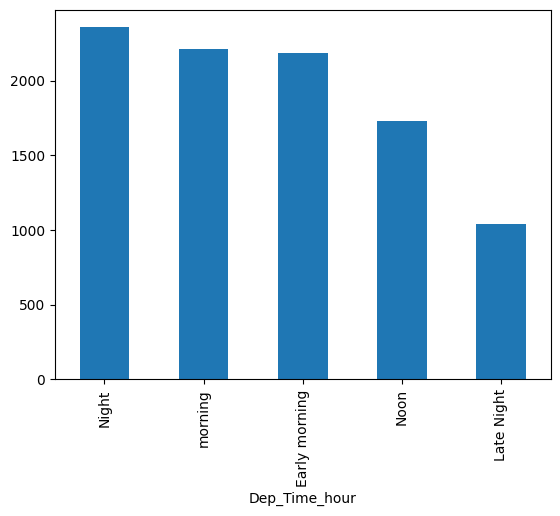

In [806]:
df['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar")

In [807]:
!pip install plotly
!pip install chart_studio

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [808]:
!pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [809]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot ,iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [810]:
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [811]:

df['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind="bar")


In [812]:
def preprocess_duration(x):
    if 'h' not in x:
        x= '0h' +' '+x
    elif 'm' not in x:
        x= x + ' '+'0m'
    return x

In [813]:
df['Duration'] = df['Duration'].apply(preprocess_duration)

In [814]:
df['Duration_hour']=df['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [815]:
df['Duration_min']=df['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1])) 


In [816]:
df['Duration']=df['Duration'].str.replace('h',"*60").str.replace(' ','+').str.replace('m',"*1").apply(eval)

In [817]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,DOJ_day,DOJ_month,DOJ_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [818]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'DOJ_day',
       'DOJ_month', 'DOJ_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_min'],
      dtype='object')

<Axes: xlabel='Duration', ylabel='Price'>

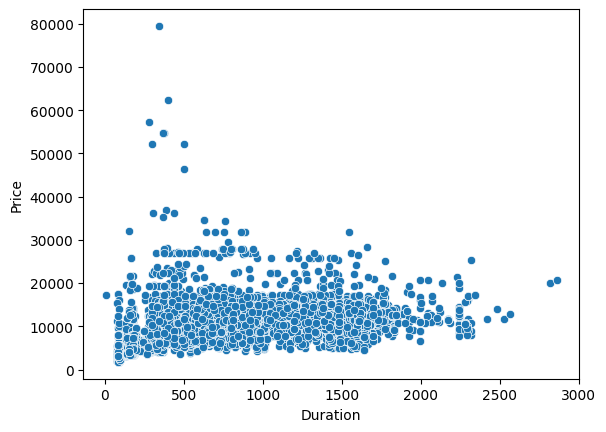

In [819]:
sns.scatterplot(x="Duration",y="Price",data=df)

<Axes: xlabel='Duration', ylabel='Price'>

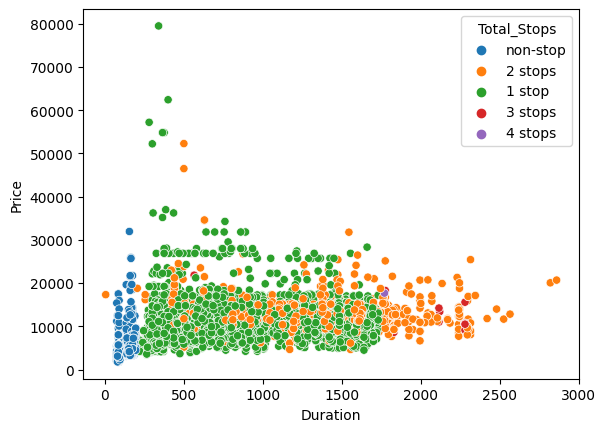

In [820]:
#hue is used to add colours for the scatter plot
sns.scatterplot(x="Duration",y="Price",hue="Total_Stops",data=df)

C:\Users\manik\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



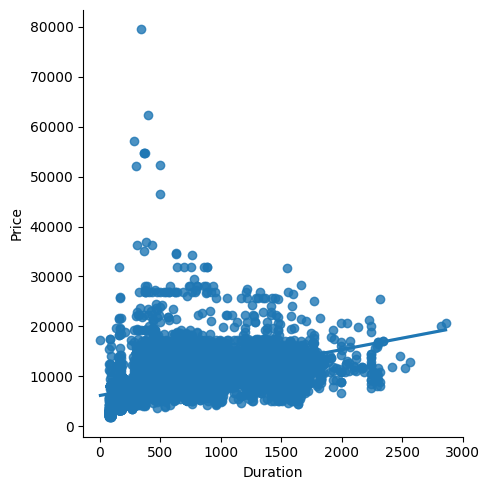

In [821]:
sns.lmplot(x="Duration",y="Price",data=df)

In [ ]:
#Assignment1
#1.On which route Jet airways is extremely used>
#2 airline vs price Analysis

In [822]:
JetAirways=df[df['Airline']=="Jet Airways"].groupby('Route').size().sort_values(ascending=False)

In [823]:
JetAirways.iplot(kind="bar")

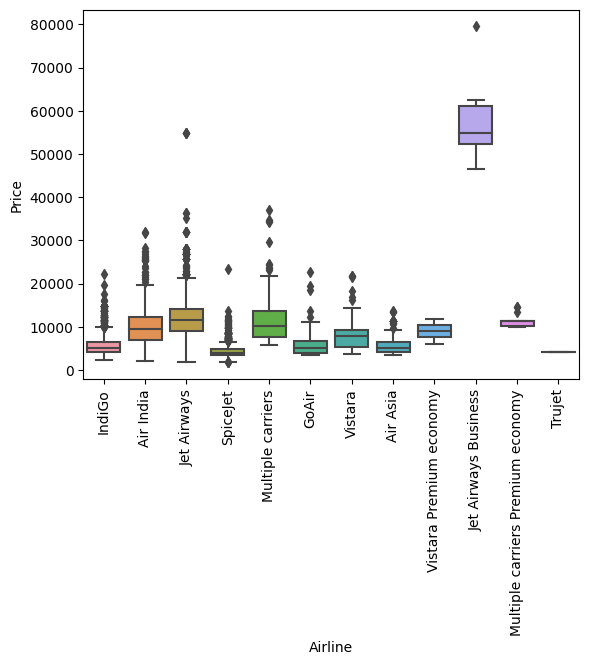

In [824]:
sns.boxplot(x='Airline',y="Price",data=df)
plt.xticks(rotation="vertical")
plt.show()

#Box plot is used to show the min price,25th percentile value,median(50th percentile value),mean,75th percentile value,max.

#top dot and below dot of boc called whiskers(so box plot is also called whiskers plot)

#Here boxplot holds 50 percent of data point
some say the lower whisker is lowest value of 1% percentile value and top whisker is 99% percent values

In [825]:
 cat_columns=[col for col in df.columns if df[col].dtype=="object"]

In [826]:
cat_columns

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [827]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [828]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
#Feature Encoding from scratch
#in this cell i am just taking for one city
#df['Source'].apply(lambda x:1 if x=='Banglore' else 0)

In [829]:
#One hot encodeing scratch
#here i am doing for entire column
for sub_category in df['Source'].unique():
    df['source_'+sub_category]=df['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [830]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,DOJ_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,...,20,1,10,2,50,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,...,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,...,25,4,25,19,0,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,...,5,23,30,5,25,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,...,50,21,35,4,45,1,0,0,0,0


#if we create more and more columns there is issue for Ml; algorithm called "Curse of Dimensionality(COD)"

Problem statements:
1.lets perform target guided encoding on data
2.Perform Manual Encoding on Data

Here traget guided encoding means that if we perform one hot encoding for Airline column we get probles of COD and so we do label encoding by taking thier mean value if their mean value is high then we assigh highest number in this case 12.

In [831]:
airlines=df.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [832]:
dict_airlines = {key:index for index,key in enumerate(airlines,0)}
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [834]:
df['Airline']=df['Airline'].map(dict_airlines)
df['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [835]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,DOJ_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,...,20,1,10,2,50,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,...,50,13,15,7,25,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,...,25,4,25,19,0,0,0,1,0,0
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,...,5,23,30,5,25,0,1,0,0,0
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,...,50,21,35,4,45,1,0,0,0,0


In [836]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [837]:
#New Delhi are delhi are so replacing new delhi with delhi
df['Destination'].replace('New Delhi','Delhi',inplace=True)

In [838]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [839]:
dest=df.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [840]:
dict_test = {key:index for index,key in enumerate(dest,0)}
dict_test

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [841]:
df['Destination']=df['Destination'].map(dict_test)

Assigmnent 2

#Perform manual Encoding on data
#Remove Un-necessary Feature

In [842]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [843]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [844]:
df['Total_Stops']=df['Total_Stops'].map(stop)

In [845]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,DOJ_day,...,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,170,0,No info,3897,24,...,20,1,10,2,50,1,0,0,0,0


In [846]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'DOJ_day',
       'DOJ_month', 'DOJ_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_min', 'source_Banglore', 'source_Kolkata', 'source_Delhi',
       'source_Chennai', 'source_Mumbai'],
      dtype='object')

In [847]:
#to get values in pecentage 
df['Additional_Info'].value_counts()/len(df)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

Here above we can observe that most of the values in the column is empty

Here the route is is similar to number of stops so we dont need route

In [848]:
df =df.drop(columns=['Date_of_Journey','Additional_Info','Source','Route','DOJ_year','Duration'])

Model Building

Lets Perform outlier detection && How to deal with outlier

In [849]:
def plot(df,col):
    fig, (ax1 ,ax2, ax3) = plt.subplots(3,1,figsize=(8, 12))
    

    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3,kde=False)
    

C:\Users\manik\AppData\Local\Temp\ipykernel_22404\3509185685.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\manik\AppData\Local\Temp\ipykernel_22404\3509185685.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




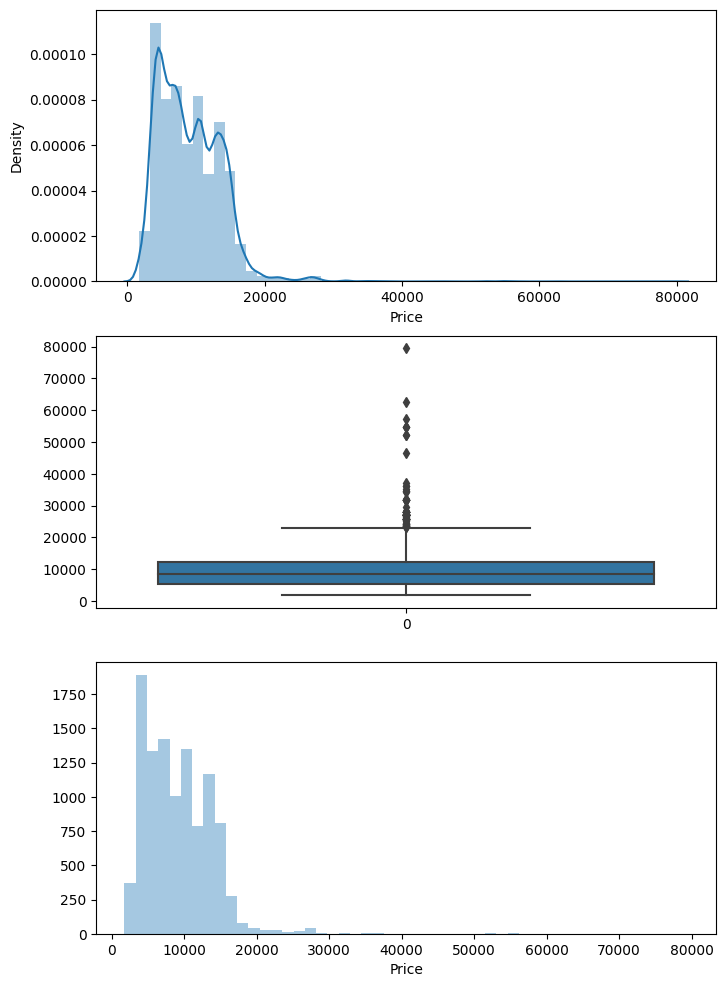

In [850]:
plot(df, 'Price')

![WhatsApp Image 2023-08-31 at 1.17.56 PM.jpeg](<attachment:WhatsApp Image 2023-08-31 at 1.17.56 PM.jpeg>)
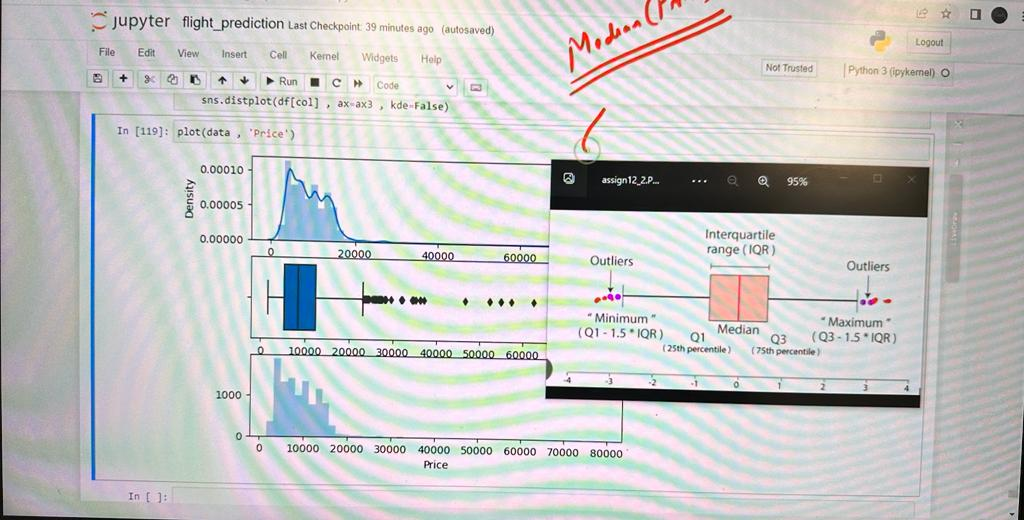

In [851]:
df.head()

,Airline,Destination,Total_Stops,Price,DOJ_day,DOJ_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_min,source_Banglore,source_Kolkata,source_Delhi,source_Chennai,source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


IQR = 75th percentile - 25th percentile

replace outlier with median value 

mean is badly effected while outliers are in data while median is not effected because median middle value



In [852]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)

iqr=q3 -q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [853]:
print (maximum)

23017.0


In [854]:
print(minimum)

-5367.0


In [855]:
#finding all outliers
len([price for price in df['Price'] if price > maximum or price < minimum])

94

In [856]:
#replacing all the outliers with meadian 
df['Price']=np.where(df['Price']>=35000,df['Price'].median(),df['Price'])

C:\Users\manik\AppData\Local\Temp\ipykernel_22404\3509185685.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\manik\AppData\Local\Temp\ipykernel_22404\3509185685.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




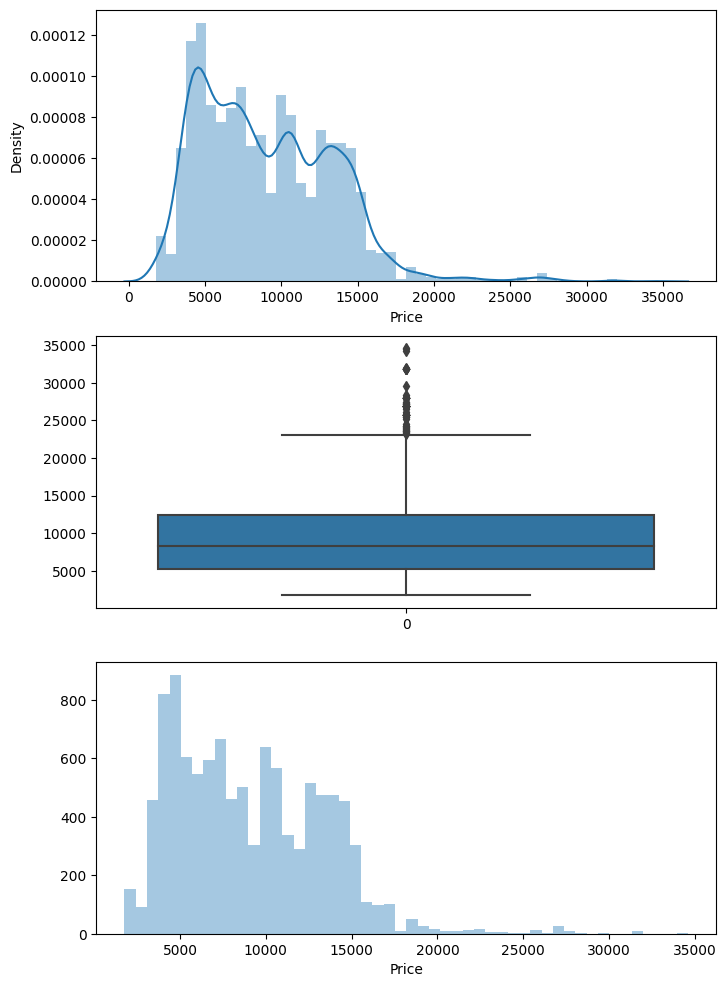

In [857]:
plot(df, 'Price')

Selecting Best Feature using feature selection

There are many feature selection algorithms we will use on of them that is 
Mutual Information(2 features are realted(dependence) ot not)

if MI=0 between two features then both are independent variables



In [858]:
df['Airline'].unique()

array([ 3,  7, 10,  1,  8,  4,  5,  2,  6, 11,  9,  0], dtype=int64)

In [859]:
X = df.drop(['Price'],axis =1)

In [860]:
Y=df['Price']

In [861]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [862]:
from sklearn.feature_selection import mutual_info_regression

In [863]:
imp = mutual_info_regression(X,Y)

In [864]:
imp

array([0.97353426, 0.99896057, 0.78466466, 0.23184701, 0.62919497,
       0.33802316, 0.27005161, 0.40322089, 0.3589888 , 0.46079942,
       0.34675468, 0.39346008, 0.45288239, 0.52197307, 0.13164214,
       0.20142601])

In [867]:
imp_df=pd.DataFrame(imp, index=X.columns)

In [870]:
imp_df.columns =['importance']

In [871]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Destination,0.998961
Airline,0.973534
Total_Stops,0.784665
DOJ_month,0.629195
source_Delhi,0.521973
Duration_hour,0.460799
source_Kolkata,0.452882
Arrival_Time_hour,0.403221
source_Banglore,0.393460
Arrival_Time_minute,0.358989


RANDOM FOREST:
#random forst used for both classification and regression algorithm.

#most of the process the RF used for classification

#it follows ensemble learning approach(it learns from multiple models and at the end it will combine all the learning)

#its is a collection of multiple decision trees

DECISION TREES:
#its another ML algorithms used for both classificationa and regression

(ensemble learnign algos are RF and XG boost)

DT:it will try to divide the data .Here if you are trying to go for part you have multiple conditions.
![Alt text](image.png)

Here on the basics of time and money you are taking decisions here 
![Alt text](image-1.png)

here we have two features on the basic of these two you are taking decisions and here DT is resposible for building tree.(with parent and chils nodes)

how to select parent node?

using the Entrophy and information gain you can easily find out of parent node

two ways you can built DT

1)Entrophy and Info gain
2)gini index(or impurity)



Entrophy:what is the probability of randomness in your data.

entrophy calculated by using -p(i)log(2)p(4)

Info gain:based on entrophy which one his going gain highest gain.

             1- sumof((sn/s)*ei)

             s = total data points in particular feature

             sn -  how may data points with respeact to column.

             ei - entrophy of fature

feature who has high IF gain then it is parent node

Gini Index:whos feature lowest gini index then its is parent node

                  1-Sum(c to i=1)(p4)2

What is Random Forest?

collections of Multiple decision Trees

inside random forest decisions trees are built using technique called Bagging or Boot strap aggregation.

ecah DT considerd as bag with data and each bag gives output let say 1 or 0.depends on the majority the output of RF is given.

(learn row sampling and column sampling)
![Alt text](image-2.png)

Here after first decision completed again the data comes back and in second DT randomly data selected.

property:RF convert high variance into low.

RF:in regression the Rf takes mean of the entire predictions

python packages to plot DT are export - viz and pydotplus

In [872]:
from sklearn.model_selection import train_test_split

In [873]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state = 42)

In [874]:
from sklearn.ensemble import RandomForestRegressor

In [878]:
RF_model=RandomForestRegressor()

In [879]:
RF_model.fit(X_train,Y_train)

RandomForestRegressor()

In [881]:
y_pred = RF_model.predict(X_test)
y_pred

array([16883.54,  5474.54,  8851.28, ...,  3549.3 ,  6368.  ,  6934.46])

In [883]:
from sklearn import metrics

In [885]:
metrics.r2_score(Y_test,y_pred)

0.8113347891503194

model dumping

In [896]:
import pickle

In [899]:
file = open(r'C:\\Users\\manik\\Desktop\\DS_projects\\flight_ticket_pred\\rf_random.pkl', 'wb')

In [900]:
pickle.dump(RF_model,file)

In [901]:
model = open(r'C:\\Users\\manik\\Desktop\\DS_projects\\flight_ticket_pred\\rf_random.pkl','rb')

In [902]:
forest = pickle.load(model)

DECISION TREE: it is a classification algorithm but it is still used in regression algorithm.

it is a base algorithm used for every ensemble technique like RF,XGBoost

whenever you have conditional data then you use for decision tree

for constructing the decision tree first we calculate the entrophy and then from entrophy we calculate the information gain(highest weightage that dependent variable) for each attribute(independent variable).

the attribute the is having high information is root note and we allocate nodes based on IF gain.

we can also use Gini Index ot Impurity for allocating root node and child node.

https://medium.com/towards-data-science/entropy-and-information-gain-in-decision-trees-c7db67a3a293

Entrophy:Randomness in your data or probability of occurance of data in certain space.

it basically gives impurity in data.